<a href="https://colab.research.google.com/github/belanasaikiran/Team-6-Big-Data-Project/blob/main/temp/Car_Make_Model_Detection_vgg16_neurons_960_random_split_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Make & Model Detection:
This project aims to detect the make and model of a given car.  
We use Stanford Car DataSet for training the model. We have over 196 classes in total for model detection.

We are dealing with 12946 images of training data. 2000 ish images for testing.

**Team Members**:

*   Ariannah Black
*   Sai Kiran Belana
*   Ummea Salma
*   Md Ishtyaq Mahmud

The DataSet is structured in the following manner

```
DataSet
├── data
│   ├── meta.csv
│   ├── test.csv
│   └── train.csv
└── images
    ├── cars_test
    └── cars_train
```


## Todo:
- [x] Import the DataSet.
- [x] Preprocessing
- [x] Feature Selection
- [x] Model Selection
- [x] Training the Model
- [ ] Fine tune the Model
- [ ] Test the Model

In [1]:
# !rm -r DataSet/ A Simple reset call to delete DataSet folder. Use it at caution

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# !unzip gdrive/MyDrive/DataSet/DataSet.zip > /dev/null # output to null
# !unzip gdrive/MyDrive/Big\ Data\ Analytics\ Project\ \(Team6\)/DataSet/DataSet.zip > /dev/null # output to null
!unzip gdrive/MyDrive/BigDataAnalyticsProject/DataSet/DataSet.zip > /dev/null # output to null

Checking if image dataset is loaded

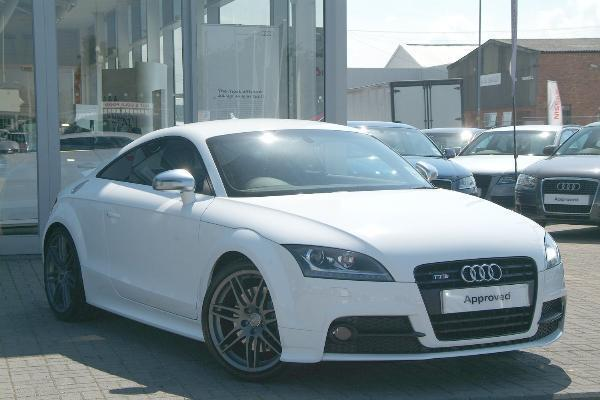

In [4]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('DataSet/images/cars_train/00001.jpg')
img

In [5]:
print(img.width, img.height)

600 400


In [6]:
import numpy as np
import pandas as pd

In [7]:
metadata = pd.read_csv("DataSet/data/meta.csv")

In [8]:
metadata.rename(columns={metadata.columns[0]: 'class_id'}, inplace=True)


In [9]:
print("Meta Data: \n")
print("Head:")
print(metadata.head())
print("\n Info:")
print(metadata.info())
print("\n Columns:")
print(metadata.columns)

Meta Data: 

Head:
   class_id                  class_name
0         1  AM General Hummer SUV 2000
1         2         Acura RL Sedan 2012
2         3         Acura TL Sedan 2012
3         4        Acura TL Type-S 2008
4         5        Acura TSX Sedan 2012

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class_id    196 non-null    int64 
 1   class_name  196 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB
None

 Columns:
Index(['class_id', 'class_name'], dtype='object')


## Load the Train & Test Datasets

### Train Data

In [10]:
train_data_raw = pd.read_csv("DataSet/data/train.csv")

print("\n Train Data: \nHead: ")
train_data_raw.head()
print("\nDescribe:")
print(train_data_raw.describe())
print("\nInfo:")
print(train_data_raw.info())
print("\nColumns:")
print(train_data_raw.columns)
print("\nShape:")
print(train_data_raw.shape)


 Train Data: 
Head: 

Describe:
         Unnamed: 0            x1            y1            x2            y2  \
count  12948.000000  12948.000000  12948.000000  12948.000000  12948.000000   
mean    3451.892339     64.701189    108.592833    638.598625    416.670683   
std     2200.262018     81.774972    106.195279    409.613163    272.818630   
min        0.000000      1.000000      1.000000     76.000000     41.000000   
25%     1618.000000     19.000000     42.000000    394.000000    250.000000   
50%     3236.500000     39.000000     80.000000    572.000000    361.000000   
75%     4906.250000     78.000000    138.000000    742.250000    475.000000   
max     8143.000000   1648.000000   1651.000000   5205.000000   3389.000000   

              class  
count  12948.000000  
mean      99.008573  
std       56.540538  
min        1.000000  
25%       50.000000  
50%       99.000000  
75%      148.000000  
max      196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [11]:
train_data_raw.tail()

Unnamed: 0  x1   y1    x2   y2  class      fname
12943        4799  49   57  1169  669     63  12944.jpg
12944        4800  23   18   640  459     16  12945.jpg
12945        4801  33   27   602  252     17  12946.jpg
12946        4802  33  142   521  376     38  12947.jpg
12947        4803  77   73   506  380     32  12948.jpg

### Fixing the `fname` for one of the value in CSV

In [12]:
# fix the file names here
train_data_raw.loc[9998, 'fname'] = '09999.jpg'

### Test Data

In [13]:
test_data_raw = pd.read_csv("DataSet/data/test.csv") #load test data


print("\n Test Data: \nHead: ")
test_data_raw.head()
print("\nDescribe:")
print(test_data_raw.describe())
print("\nInfo:")
print(test_data_raw.info())
print("\nColumns:")
print(test_data_raw.columns)
print("\nShape:")
print(test_data_raw.shape)


 Test Data: 
Head: 

Describe:
        Unnamed: 0           x1           y1           x2           y2  \
count  3237.000000  3237.000000  3237.000000  3237.000000  3237.000000   
mean   1618.000000    66.103491   106.835650   639.691999   417.637010   
std     934.585737    84.198376   106.736782   417.499266   279.758425   
min       0.000000     1.000000     1.000000    72.000000    49.000000   
25%     809.000000    18.000000    40.000000   389.000000   242.000000   
50%    1618.000000    39.000000    77.000000   573.000000   363.000000   
75%    2427.000000    80.000000   135.000000   763.000000   487.000000   
max    3236.000000   872.000000  1311.000000  7224.000000  3835.000000   

             class  
count  3237.000000  
mean     98.852950  
std      56.359186  
min       1.000000  
25%      51.000000  
50%      99.000000  
75%     148.000000  
max     196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3237 entries, 0 to 3236
Data columns (total 7 columns):

In [14]:
test_data_raw

Unnamed: 0   x1   y1    x2   y2  class      fname
0              0   30   52   246  147    181  00001.jpg
1              1  100   19   576  203    103  00002.jpg
2              2   51  105   968  659    145  00003.jpg
3              3   67   84   581  407    187  00004.jpg
4              4  140  151   593  339    185  00005.jpg
...          ...  ...  ...   ...  ...    ...        ...
3232        3232   72  121  1214  664     79  03233.jpg
3233        3233   51    8   777  401    159  03234.jpg
3234        3234   14   38   252  161    162  03235.jpg
3235        3235   12   53   249  132     69  03236.jpg
3236        3236   90  106   420  331     99  03237.jpg

[3237 rows x 7 columns]

In [15]:
start_index = 12949
test_data_raw['fname'] = test_data_raw.index.map(lambda x: str(start_index + x) + '.jpg')

In [16]:
#count the number of images available in /content/DataSet/images/cars_test folder

import os

# Get the path of the folder containing the test images
test_images_path = "/content/DataSet/images/cars_test"

# Count the number of files in the folder
num_test_images = len(os.listdir(test_images_path))

# Print the number of test images
print(f"Number of test images: {num_test_images}")

Number of test images: 3238


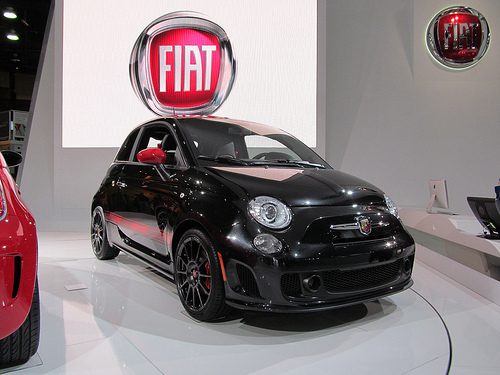

In [17]:
img = tf.keras.preprocessing.image.load_img('DataSet/images/cars_test/03237.jpg')
img

In [18]:
!rm -r /content/DataSet/images/cars_test_new/
import os
import shutil

# Get the path of the folders
test_images_path = "/content/DataSet/images/cars_test"
new_test_images_path = "/content/DataSet/images/cars_test_new"

# Create the new directory
os.makedirs(new_test_images_path, exist_ok=True)

# Iterate over the files in the test images folder
for filename in os.listdir(test_images_path):
  # Get the file extension
  file_ext = os.path.splitext(filename)[1]

  # Check if the file is an image
  if file_ext in [".jpg"]:
    # Get the original image number
    image_num = int(filename[:5])

    # Calculate the new image number
    new_image_num = image_num + 12948

    # Create the new filename
    new_filename = str(new_image_num).zfill(5) + file_ext

    # Copy the image to the new directory
    shutil.copyfile(os.path.join(test_images_path, filename), os.path.join(new_test_images_path, new_filename))


rm: cannot remove '/content/DataSet/images/cars_test_new/': No such file or directory


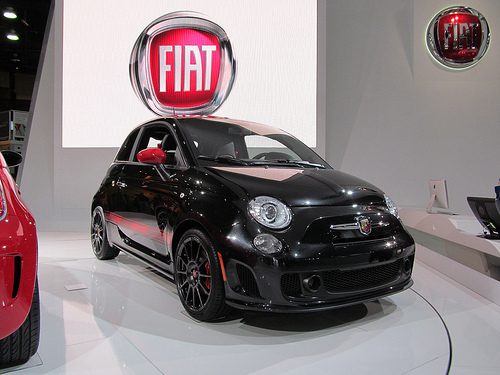

In [19]:
img = tf.keras.preprocessing.image.load_img('DataSet/images/cars_test_new/16185.jpg')
img

### **Let's do the random split for train and test since we are unsure if the train and test data are properly splitted.**

1. Combine both train and test dataframes.
2. Split the new dataframe into train and test randomly.
3. Now, let's untouch the new test dataframe
4. and Split the train to validation and train again.

1. Combine raw train and test dataframes

In [20]:
complete_data = pd.concat([train_data_raw, test_data_raw])

print("Complete Data: \nHead: ")
complete_data.head()
print("\nDescribe:")
print(complete_data.describe())
print("\nInfo:")
print(complete_data.info())
print("\nColumns:")
print(complete_data.columns)
print("\nShape:")
print(complete_data.shape)

Complete Data: 
Head: 

Describe:
         Unnamed: 0            x1            y1            x2            y2  \
count  16185.000000  16185.000000  16185.000000  16185.000000  16185.000000   
mean    3085.113871     64.981650    108.241396    638.817300    416.863948   
std     2141.412731     82.264644    106.302820    411.189718    274.212181   
min        0.000000      1.000000      1.000000     72.000000     41.000000   
25%     1348.000000     19.000000     41.000000    393.000000    248.000000   
50%     2697.000000     39.000000     79.000000    572.000000    362.000000   
75%     4450.000000     78.000000    138.000000    747.000000    477.000000   
max     8143.000000   1648.000000   1651.000000   7224.000000   3835.000000   

              class  
count  16185.000000  
mean      98.977448  
std       56.502610  
min        1.000000  
25%       50.000000  
50%       99.000000  
75%      148.000000  
max      196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1618

2. Split the new dataframe into train and test randomly.

In [21]:
import sklearn
from sklearn.model_selection import train_test_split
train_data_temp, test_data = train_test_split(complete_data, test_size=0.2, random_state=42) # Split the training Dataframe to train and validation

In [22]:
print("Training set size:", train_data_temp.shape)
print("Test set size:", test_data.shape)

Training set size: (12948, 7)
Test set size: (3237, 7)


3. We won't touch the test dataframe now.
4. Split the train to validation and train again.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_data, validation_data = train_test_split(train_data_temp, test_size=3237, random_state=42) # Split the training Dataframe to train and validation

In [25]:
print("Training set size:", train_data.shape)
print("Validation set size:", validation_data.shape)

Training set size: (9711, 7)
Validation set size: (3237, 7)


In [26]:
print("\n Train Data: \nHead: ")
train_data.head()
print("\nDescribe:")
print(train_data.describe())
print("\nInfo:")
print(train_data.info())
print("\nColumns:")
print(train_data.columns)
print("\nShape:")
print(train_data.shape)


 Train Data: 
Head: 

Describe:
        Unnamed: 0           x1           y1           x2           y2  \
count  9711.000000  9711.000000  9711.000000  9711.000000  9711.000000   
mean   3095.307589    64.810627   107.800227   640.296365   417.544949   
std    2139.576420    82.270418   106.974844   420.286047   280.621055   
min       0.000000     1.000000     1.000000    72.000000    46.000000   
25%    1341.000000    19.000000    41.000000   393.000000   247.500000   
50%    2721.000000    39.000000    79.000000   571.000000   360.000000   
75%    4478.000000    78.000000   137.500000   746.000000   476.000000   
max    8143.000000  1648.000000  1651.000000  7224.000000  3835.000000   

             class  
count  9711.000000  
mean     98.977963  
std      56.360362  
min       1.000000  
25%      51.000000  
50%     100.000000  
75%     148.000000  
max     196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9711 entries, 8345 to 12070
Data columns (total 7 columns):

In [27]:
print("\n Validation Data: \nHead: ")
validation_data.head()
print("\nDescribe:")
print(validation_data.describe())
print("\nInfo:")
print(validation_data.info())
print("\nColumns:")
print(validation_data.columns)
print("\nShape:")
print(validation_data.shape)


 Validation Data: 
Head: 

Describe:
        Unnamed: 0           x1           y1           x2           y2  \
count  3237.000000  3237.000000  3237.000000  3237.000000  3237.000000   
mean   3035.640099    66.414890   110.007105   642.528576   419.146123   
std    2155.122131    83.846842   106.158569   394.633143   263.715342   
min       1.000000     1.000000     1.000000    76.000000    41.000000   
25%    1299.000000    19.000000    42.000000   398.000000   253.000000   
50%    2612.000000    39.000000    81.000000   574.000000   366.000000   
75%    4381.000000    79.000000   141.000000   757.000000   480.000000   
max    8138.000000   924.000000  1189.000000  3781.000000  2994.000000   

             class  
count  3237.000000  
mean    100.170837  
std      56.347469  
min       1.000000  
25%      52.000000  
50%     100.000000  
75%     149.000000  
max     196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3237 entries, 4131 to 7962
Data columns (total 7 colum

Let's store all images in one folder so we can extract the files when we resize them

In [28]:
#copy all images from /content/DataSet/cars_train/ to /content/DataSet/images_raw in python. Only the images in the folder

import os
import shutil

if not os.path.exists("/content/DataSet/images_raw"):
  os.makedirs("/content/DataSet/images_raw")

source_dir = "/content/DataSet/images/cars_train/"
target_dir = "/content/DataSet/images_raw/"

def copy_images(source_dir, target_dir):
  # Iterate over the files in the source directory
  for filename in os.listdir(source_dir):
    command = "cp " + source_dir + filename + " " + target_dir
    os.system(command)
    # print(command)
    # # Check if the file is an image
    # if filename.endswith(".jpg"):
    #   # Copy the image to the target directory
    #   shutil.copy(os.path.join(source_dir, filename), os.path.join(target_dir, filename))

copy_images(source_dir, target_dir)

source_dir = "/content/DataSet/images/cars_test_new/"
copy_images(source_dir, target_dir)

In [29]:

import os

# Get the path of the folder containing the raw images
raw_images_path = "/content/DataSet/images_raw"

# Count the number of files in the folder
num_raw_images = len(os.listdir(raw_images_path))

# Print the number of raw images
print(f"Number of raw images: {num_raw_images}")



Number of raw images: 16185


## Now, Let's Plot some pictures before we train the model

Libraries

In [30]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random

In [31]:
class_names = metadata["class_name"]
class_names

0            AM General Hummer SUV 2000
1                   Acura RL Sedan 2012
2                   Acura TL Sedan 2012
3                  Acura TL Type-S 2008
4                  Acura TSX Sedan 2012
                     ...               
191    Volkswagen Beetle Hatchback 2012
192            Volvo C30 Hatchback 2012
193                Volvo 240 Sedan 1993
194                 Volvo XC90 SUV 2007
195       smart fortwo Convertible 2012
Name: class_name, Length: 196, dtype: object

In [32]:
train_data

Unnamed: 0  x1   y1   x2   y2  class      fname
8345          201  12   32  251  161     69  08346.jpg
972           972  41   26  842  262     92  00973.jpg
7502         7502  25  134  618  427     23  07503.jpg
8086         8086   5   14   84   55    123  08087.jpg
3782         3782   6  165  545  360    128  03783.jpg
...           ...  ..  ...  ...  ...    ...        ...
4804         4804  34   19  772  488    150  04805.jpg
1450         1450  81   68  385  310    118  14399.jpg
7318         7318  33   87  470  296    137  07319.jpg
3834         3834   7   42  636  402     35  03835.jpg
12070        3926  23  140  543  308    122  12071.jpg

[9711 rows x 7 columns]

# Data Preprocessing


**Let's get an Average of images available per class**

We should get around 66 images per class with the `stanford car dataset`

In [33]:
counter = 0 #no. of images available per class in our dataset
average = 0 #average no. of images availabe for all our classes for training

for y in range(1, 197):
  for x in train_data['class']:
    if (x == y):
      # print("x, y", x, y)
      counter = counter+1;
  average = (average + counter)/y


print("Average:", average)

Average: 49.800046225901134


In [34]:
from PIL import Image
import os, shutil

Move images from images_raw folder to cars_train, cars_validation & cars_test folders

In [35]:
# cars_train_images_dir = '/content/DataSet/cars_train/'
# cars_valid_images_dir = '/content/DataSet/cars_validation/'
# cars_test_images_dir = '/content/DataSet/cars_test/'
# cars_images_raw_dir = '/content/DataSet/images_raw/'

# # create directory if does not exist
# if not os.path.exists(cars_valid_images_dir):
#   os.makedirs(cars_valid_images_dir)

# if not os.path.exists(cars_train_images_dir):
#   os.makedirs(cars_train_images_dir)

# if not os.path.exists(cars_test_images_dir):
#   os.makedirs(cars_test_images_dir)

In [36]:
train_data

Unnamed: 0  x1   y1   x2   y2  class      fname
8345          201  12   32  251  161     69  08346.jpg
972           972  41   26  842  262     92  00973.jpg
7502         7502  25  134  618  427     23  07503.jpg
8086         8086   5   14   84   55    123  08087.jpg
3782         3782   6  165  545  360    128  03783.jpg
...           ...  ..  ...  ...  ...    ...        ...
4804         4804  34   19  772  488    150  04805.jpg
1450         1450  81   68  385  310    118  14399.jpg
7318         7318  33   87  470  296    137  07319.jpg
3834         3834   7   42  636  402     35  03835.jpg
12070        3926  23  140  543  308    122  12071.jpg

[9711 rows x 7 columns]

In [37]:
# !ls /content/DataSet/images_raw/

In [38]:
# for filename in train_data['fname']:
#   source_path = os.path.join(cars_images_raw_dir, filename)
#   if os.path.exists(source_path):
#     print(source_path)
#   destination_path = os.path.join(cars_train_images_dir, filename)
#   # print(destination_path)
#   # move the file

#   shutil.move(source_path, destination_path)

# for filename in validation_data['fname']:
#   source_path = os.path.join(cars_images_raw_dir, filename)
#   destination_path = os.path.join(cars_valid_images_dir, filename)
#   # move the file
#   shutil.move(source_path, destination_path)


# for filename in test_data['fname']:
#   source_path = os.path.join(cars_images_raw_dir, filename)
#   destination_path = os.path.join(cars_test_images_dir, filename)

#   # move the file
#   shutil.move(source_path, destination_path)

Before we resize the images, Let's see the small resolution image available in the dataset to avoid any mis handling of images during the training phase of dataset

In [39]:
complete_data

Unnamed: 0   x1   y1    x2    y2  class      fname
0              0   39  116   569   375     14  00001.jpg
1              1   36  116   868   587      3  00002.jpg
2              2   85  109   601   381     91  00003.jpg
3              3  621  393  1484  1096    134  00004.jpg
4              4   14   36   133    99    106  00005.jpg
...          ...  ...  ...   ...   ...    ...        ...
3232        3232   72  121  1214   664     79  16181.jpg
3233        3233   51    8   777   401    159  16182.jpg
3234        3234   14   38   252   161    162  16183.jpg
3235        3235   12   53   249   132     69  16184.jpg
3236        3236   90  106   420   331     99  16185.jpg

[16185 rows x 7 columns]

In [40]:
temp_width = 190000 # some random value which should be high to compare and get the smallest width(px size) of the available images in the dataset
temp_height = 19000

smallest_width_image = ""
smallest_height_image = ""


def ImageSizeChecker():
  global temp_width, temp_height, smallest_height_image, smallest_width_image
  for i in range(0, len(complete_data)):
    image_path = "/content/DataSet/images_raw/" + complete_data['fname'].iloc[i]
    img = tf.keras.preprocessing.image.load_img(image_path)

    # print(img.width, img.height)
    if (img.width < temp_width):
      temp_width = img.width
      smallest_width_image = complete_data['fname'].iloc[i]
      # print("Image Width Size for ", i, "th image: ",  temp_width)
    if (img.height < temp_height):
      temp_height = img.width
      smallest_height_image = complete_data['fname'].iloc[i]
      # print("Image height Size for ", i, "th image: ",  temp_width)
    if i == len(complete_data)-1:
      print("END")
      print(temp_width, temp_height)
      print(smallest_width_image, smallest_height_image)

# ImageSizeChecker(


ImageSizeChecker()



END
78 174
00097.jpg 16015.jpg


Checking which images have low resolution

train_data name 96    00097.jpg
96    13045.jpg
Name: fname, dtype: object
78 58


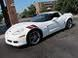

In [41]:
small_image_1 = 'DataSet/images_raw/' + complete_data['fname'].iloc[96]
print("train_data name", complete_data['fname'][96])
img1 = tf.keras.preprocessing.image.load_img(small_image_1)

print(img1.width, img1.height)

img1


174 150


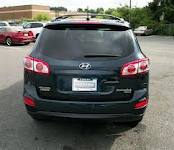

In [42]:
small_image_2 = 'DataSet/images_raw/' + complete_data['fname'].iloc[16014]
# print("train_data name", train_data['fname'][9710])

img2 = tf.keras.preprocessing.image.load_img(small_image_2)
print(img2.width, img2.height)
img2

### Crop and Resize the Training DataSet images to 224x224 pixels:

> *Cropping the images using bounding boxes and separating the images into their respective folders accoringly.*

*   Read the dataset from CSV file
*   Iterate over each image, resize it and its bounding box in CSV
*   **Crop the image using bounding box coordinates**
*   Resize the croppedImage to 224x224 pixels (CNNs can easily train on square images)
*   Save the cropped resize image
*   ~~Update the bounding box coordinates in the new dataframe called `train_data_resized`.~~

> *Resizing the dataset to a square size  helps in training the model much faster as we deal with image datasets which inturn uses matrix multiplications for this type of problem*




> ***Choosing 224x224 as an ideal choice since it may contain more details of each car for classification***

In [43]:
new_size = (224,224)

In [44]:
import os, shutil, pathlib

In [45]:
!rm -r DataSet/croppedResizedImages/ #remove the folder if it exists

rm: cannot remove 'DataSet/croppedResizedImages/': No such file or directory


In [46]:
# dataset folder
train_dataset_image_folder = 'DataSet/cars_train/'
validation_dataset_image_folder = 'DataSet/cars_validation/'
test_dataset_image_folder = 'DataSet/cars_test/'
complete_dataset_image_folder = '/content/DataSet/images_raw/'

train_cropped_images_save_path ='/content/DataSet/croppedResizedImages/train' #setting a custom path for storing the resized data
validation_cropped_images_save_path ='/content/DataSet/croppedResizedImages/validation' #setting a custom path for storing the resized data
test_cropped_images_save_path ='/content/DataSet/croppedResizedImages/test' #setting a custom path for storing the resized data

In [47]:
print(len(train_data))

9711


In [48]:
complete_data

Unnamed: 0   x1   y1    x2    y2  class      fname
0              0   39  116   569   375     14  00001.jpg
1              1   36  116   868   587      3  00002.jpg
2              2   85  109   601   381     91  00003.jpg
3              3  621  393  1484  1096    134  00004.jpg
4              4   14   36   133    99    106  00005.jpg
...          ...  ...  ...   ...   ...    ...        ...
3232        3232   72  121  1214   664     79  16181.jpg
3233        3233   51    8   777   401    159  16182.jpg
3234        3234   14   38   252   161    162  16183.jpg
3235        3235   12   53   249   132     69  16184.jpg
3236        3236   90  106   420   331     99  16185.jpg

[16185 rows x 7 columns]

In [49]:
train_data['fname'][5]

5    12954.jpg
5    00006.jpg
Name: fname, dtype: object

In [50]:
train_data.head(20)

Unnamed: 0   x1   y1    x2    y2  class      fname
8345          201   12   32   251   161     69  08346.jpg
972           972   41   26   842   262     92  00973.jpg
7502         7502   25  134   618   427     23  07503.jpg
8086         8086    5   14    84    55    123  08087.jpg
3782         3782    6  165   545   360    128  03783.jpg
4854         4854   34   57   350   226    139  04855.jpg
1262         1262    1   21   639   470    143  01263.jpg
9809         1665  142  175  1354   916    147  09810.jpg
12498        4354  157  131  1122   880    196  12499.jpg
2727         2727   38  165   847   447    112  15676.jpg
9864         1720   44   78  2207  1116     36  09865.jpg
2208         2208   25   76   563   312     53  02209.jpg
2757         2757   50   57   474   283     28  02758.jpg
6875         6875    8   36   455   318     71  06876.jpg
2139         2139   13  111   567   363    114  15088.jpg
228           228    5   46   255   138    136  00229.jpg
11907        3763   63   70   553   410     65  11908.jpg
5151         5151   48   92   261   161     59  05152.jpg
467           467    1   18   300   147    111  00468.jpg
12551        4407   35   32   480   293     28  12552.jpg

In [51]:
# process each image - CROPPING

if not os.path.exists(train_cropped_images_save_path):
  os.makedirs(train_cropped_images_save_path)

if not os.path.exists(validation_cropped_images_save_path):
  os.makedirs(validation_cropped_images_save_path)

if not os.path.exists(test_cropped_images_save_path):
  os.makedirs(test_cropped_images_save_path)

from PIL import Image


# Image Cropper Function
def ImageCropper(save_path, class_name, image_path, x1, y1, x2, y2):
  # print(image_path)
  im = Image.open(image_path);
  croppedImage = im.crop((x1, y1, x2, y2))

  # print("Cropping Finished")
  filename = os.path.basename(image_path)
  # class_image_save_path = save_path + "/" + str(class_name) + "/" # this line separates all the images to separate folders according to the class no.
  class_image_save_path = save_path + "/" + str(class_name) + "/"

  if not os.path.exists(class_image_save_path):
    os.makedirs(class_image_save_path)

  resized_image = croppedImage.resize(new_size)

  #save the resized image
  if not os.path.exists(class_image_save_path):
    os.makedirs(class_image_save_path)

  resized_image.save(os.path.join(class_image_save_path, filename))


# def processCrop(crop_images_save_path, dataset_image_folder, data_df):
#   for index, row in data_df.iterrows():
#     print(crop_images_save_path)
#     print(index)
#     print(row)

def processCrop(crop_images_save_path, dataset_image_folder, data_df):
    for index in range(len(data_df)):
        if index < len(data_df):
            # Call the image cropper function
            ImageCropper(crop_images_save_path, data_df['class'].iloc[index] , dataset_image_folder + data_df['fname'].iloc[index], data_df['x1'].iloc[index], data_df['y1'].iloc[index], data_df['x2'].iloc[index], data_df['y2'].iloc[index])

    # Call the image cropper function
    # ImageCropper(crop_images_save_path, data_df['class'].iloc[index] , dataset_image_folder + data_df['fname'].iloc[index], data_df['x1'].iloc[index], data_df['y1'].iloc[index], data_df['x2'].iloc[index], data_df['y2'].iloc[index])

        if index == len(data_df) - 1:
          print(crop_images_save_path, ": All Images have been cropped")


In [52]:
processCrop(train_cropped_images_save_path, complete_dataset_image_folder, train_data)
processCrop(validation_cropped_images_save_path, complete_dataset_image_folder, validation_data)
processCrop(test_cropped_images_save_path, complete_dataset_image_folder, test_data)

/content/DataSet/croppedResizedImages/train : All Images have been cropped
/content/DataSet/croppedResizedImages/validation : All Images have been cropped
/content/DataSet/croppedResizedImages/test : All Images have been cropped


Using `image_dataset_from_directort` to read the cropped and resized images

Creating a variable for resized data that we can use to update the bounding box information

In [53]:
from keras.utils import image_dataset_from_directory
cropped_dataset_directory = "/content/DataSet/croppedResizedImages/"

train_dataset = image_dataset_from_directory(
    cropped_dataset_directory + "/train",
    image_size=(224, 224),
)
validation_dataset = image_dataset_from_directory(
    cropped_dataset_directory + "/validation",
    image_size=(224, 224),
)
test_dataset = image_dataset_from_directory(
    cropped_dataset_directory + "/test",
    image_size=(224, 224),
)

Found 9711 files belonging to 196 classes.
Found 3237 files belonging to 196 classes.
Found 3237 files belonging to 196 classes.


In [54]:
# !ls DataSet/images/cars_train #uncomment to see the no. of images we have

In [55]:
# !ls DataSet/resized_images/ #let's see the count of resized cropped images.

#Prepare the Data for Machine Learning Algorithms

Checking we have any missing value

In [56]:
sample_incomplete_rows = train_data[train_data.isnull().any(axis=1)].head() #maybe we don't have any missing data
pd.set_option('display.max_columns', None)
sample_incomplete_rows

Empty DataFrame
Columns: [Unnamed: 0, x1, y1, x2, y2, class, fname]
Index: []

> WE DON'T HAVE TO DO NORMALIZATION AS WE DID IT WHEN WE RESIZED THE IMAGES TO SAME RESOLUTION


### This step helps in training the transfer learning model much easier.

# Load all the Images to start traning


In [57]:
import cv2  # Or from PIL import Image  if using Pillow

Define data paths

In [58]:
image_train_data_dir = "DataSet/croppedResizedImages/train"
image_validation_data_dir = "DataSet/croppedResizedImages/validation"
image_test_data_dir = "DataSet/croppedResizedImages/test"

In [59]:
def load_image(filepath, target_size=(224, 224)):  # Adjust target size if needed
    img = cv2.imread(filepath)  # Or img = Image.open(filepath) for Pillow
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if using OpenCV
    img = cv2.resize(img, target_size)
    return img

### Prepare Training Data

Creating a dictionary to map image filenames to their corresponding class labels

In [60]:
image_label_map = dict(zip(train_data["fname"], train_data["class"]))  # Adjust column names if needed

###  Data Augmentation (Highly Recommended):

Create an ImageDataGenerator object to perform on-the-fly data augmentation during training, which helps prevent overfitting and improve model generalization perform Data Augmentation

> **In Simple, we generate different transformations of images to increase the image dataset size and balance it for our training since we are extremely dealing with very small dataset.**

Since the dataset is limited, augmenting our data artificially increasing the diversity of our training data.

In [61]:
# Convert "class" column to string before using flow_from_dataframe
train_data['class'] = train_data['class'].astype(str)

In [62]:
# train_data_df = pd.concat([X_train, y_train], axis=1)
# train_data.columns = ['fname', 'class']

In [63]:
from tensorflow import keras
from keras import layers

In [64]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# Reducing the rotation range for vehicle data is based on the assumption that, in real-world scenarios, vehicles are typically seen upright, and significant rotations (like those you might see with arbitrary objects) are not common.
# Vehicles rarely, if ever, appear upside-down or at steep angles in standard road scenes.


### Load and Augment Training Data:

Use train_datagen.flow_from_directory to automatically load, preprocess, and augment images from your training directory:

Use train_datagen.flow_from_dataframe to generate batches of images and labels from your DataFrame:

Displaying some randomly augmented training images

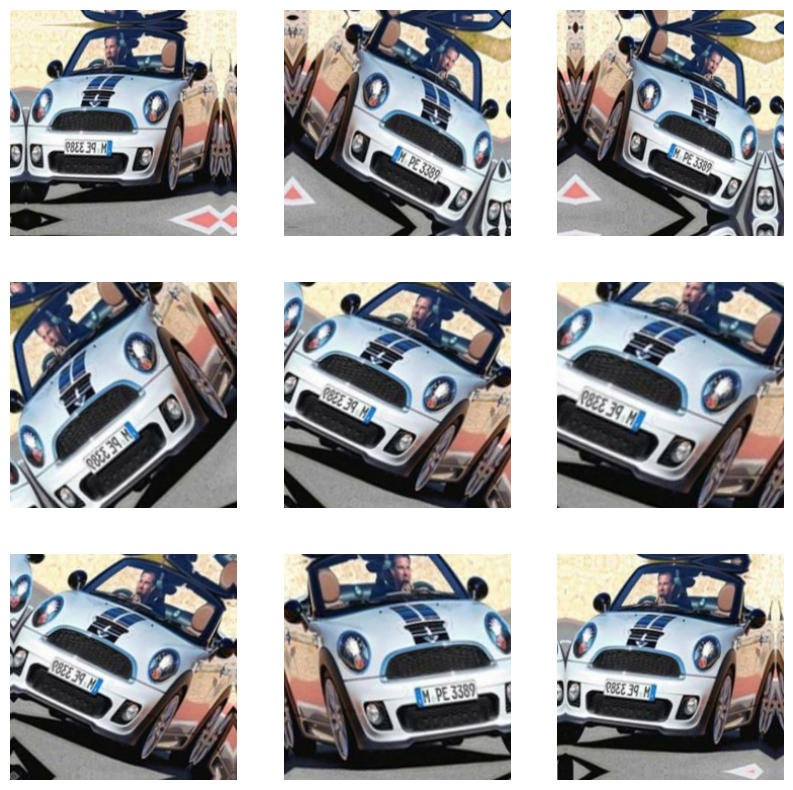

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Defining a new convnet that includes image augmentation and dropout

In [66]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(196, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

Training the regularized convnet

In [67]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.h5",
        save_best_only=True,
        monitor="val_loss"),
    keras.callbacks.EarlyStopping(patience=10)
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
304/304 [==============================] - 15s 31ms/step - loss: 5.2588 - accuracy: 0.0080 - val_loss: 5.1638 - val_accuracy: 0.0142
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


304/304 [==============================] - 9s 28ms/step - loss: 5.1472 - accuracy: 0.0153 - val_loss: 5.1213 - val_accuracy: 0.0216
Epoch 3/50
304/304 [==============================] - 8s 28ms/step - loss: 5.0785 - accuracy: 0.0246 - val_loss: 5.2633 - val_accuracy: 0.0213
Epoch 4/50
304/304 [==============================] - 9s 28ms/step - loss: 4.9424 - accuracy: 0.0353 - val_loss: 5.0676 - val_accuracy: 0.0337
Epoch 5/50
304/304 [==============================] - 9s 28ms/step - loss: 4.7911 - accuracy: 0.0490 - val_loss: 4.7319 - val_accuracy: 0.0609
Epoch 6/50
304/304 [==============================] - 9s 28ms/step - loss: 4.6618 - accuracy: 0.0614 - val_loss: 4.7178 - val_accuracy: 0.0652
Epoch 7/50
304/304 [==============================] - 9s 28ms/step - loss: 4.5383 - accuracy: 0.0768 - val_loss: 4.5720 - val_accuracy: 0.0871
Epoch 8/50
304/304 [==============================] - 9s 28ms/step - loss: 4.3835 - accuracy: 0.0932 - val_loss: 4.3760 - val_accuracy: 0.1010
Epoch 9/50

# Leveraging a pretrained model

## Feature extraction with a pretrained model

Instantiating the VGG16 convolutional base

In [68]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [69]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [70]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 20ms/step


In [71]:
train_features.shape

(9711, 7, 7, 512)

Defining and training the densely connected classifier

In [72]:
inputs = keras.Input(shape=(7, 7, 512))
x = layers.GlobalAveragePooling2D(input_shape=(7,7,512)) # ref: https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(196, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.h5",
      save_best_only=True,
      monitor="val_loss"),
    keras.callbacks.EarlyStopping(patience=10)
]

In [73]:
history = model.fit(
    train_features, train_labels,
    epochs=50,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/50
304/304 [==============================] - 3s 7ms/step - loss: 175.6091 - accuracy: 0.1063 - val_loss: 99.0927 - val_accuracy: 0.2561
Epoch 2/50
304/304 [==============================] - 1s 5ms/step - loss: 71.0047 - accuracy: 0.4614 - val_loss: 87.5307 - val_accuracy: 0.3732
Epoch 3/50
304/304 [==============================] - 1s 5ms/step - loss: 43.5731 - accuracy: 0.6434 - val_loss: 84.9591 - val_accuracy: 0.4334
Epoch 4/50
304/304 [==============================] - 1s 4ms/step - loss: 33.7918 - accuracy: 0.7297 - val_loss: 92.5688 - val_accuracy: 0.4649
Epoch 5/50
304/304 [==============================] - 1s 5ms/step - loss: 26.7872 - accuracy: 0.7888 - val_loss: 82.7431 - val_accuracy: 0.5091
Epoch 6/50
304/304 [==============================] - 1s 4ms/step - loss: 22.4984 - accuracy: 0.8212 - val_loss: 86.0368 - val_accuracy: 0.5045
Epoch 7/50
304/304 [==============================] - 1s 4ms/step - loss: 20.1707 - accuracy: 0.8435 - val_loss: 84.6190 - val_accuracy

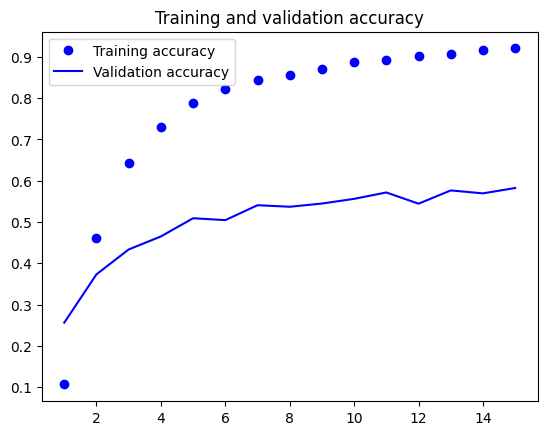

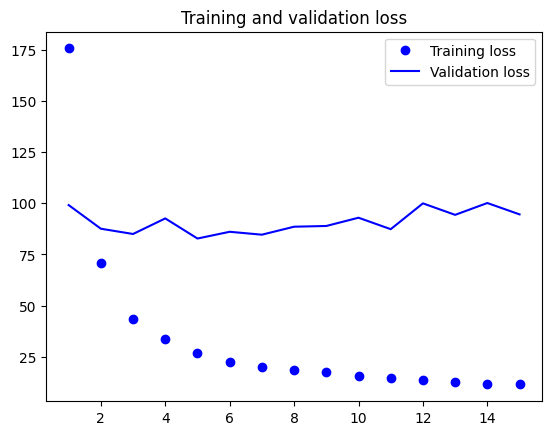

In [74]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Feature extraction together with data augmentation

Instantiating and freezing the VGG16 convolutional base

In [75]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [76]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 19ms/step


Adding a data augmentation stage and a classifier to the convolutional base

In [77]:
# inputs = keras.Input(shape=(224, 224, 3))
# x = data_augmentation(inputs)
# x = keras.applications.vgg16.preprocess_input(x)
# x = conv_base(x)
# x = layers.Flatten()(x)
# x = layers.Dense(256)(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(196, activation="softmax")(x)

inputs = keras.Input(shape=(224, 224, 3))
y = data_augmentation(inputs)
y = keras.applications.vgg16.preprocess_input(y)
y = conv_base(y)
y = layers.Flatten()(y) # Flatten dimensions to for use in FC layers
y = layers.Dense(960, activation='relu')(y)
y = layers.BatchNormalization()(y)  # Add batch normalization
y = layers.Dropout(0.5)(y)  # Another dropout layer to reduce overfitting

# Additional dense layer with 512 units, ReLU activation, and batch normalization
y = layers.Dense(960, activation='relu')(y)
y = layers.BatchNormalization()(y)  # Add batch normalization
y = layers.Dropout(0.5)(y)  # Another dropout layer to reduce overfitting

outputs = layers.Dense(196, activation='softmax')(y) # Softmax for multiclass


model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [78]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.h5",
        save_best_only=True,
        monitor="val_loss"),
    keras.callbacks.EarlyStopping(patience=10)
]

In [79]:
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
304/304 [==============================] - 21s 61ms/step - loss: 5.5081 - accuracy: 0.0390 - val_loss: 4.3613 - val_accuracy: 0.1301
Epoch 2/50
304/304 [==============================] - 19s 61ms/step - loss: 4.2226 - accuracy: 0.1281 - val_loss: 3.2437 - val_accuracy: 0.2425
Epoch 3/50
304/304 [==============================] - 19s 61ms/step - loss: 3.5603 - accuracy: 0.2116 - val_loss: 2.7344 - val_accuracy: 0.3534
Epoch 4/50
304/304 [==============================] - 19s 62ms/step - loss: 3.0778 - accuracy: 0.3006 - val_loss: 2.4386 - val_accuracy: 0.4276
Epoch 5/50
304/304 [==============================] - 19s 61ms/step - loss: 2.7968 - accuracy: 0.3574 - val_loss: 2.1857 - val_accuracy: 0.4711
Epoch 6/50
304/304 [==============================] - 19s 61ms/step - loss: 2.5783 - accuracy: 0.3990 - val_loss: 2.0275 - val_accuracy: 0.5134
Epoch 7/50
304/304 [==============================] - 19s 61ms/step - loss: 2.3843 - accuracy: 0.4454 - val_loss: 1.9295 - val_accuracy:

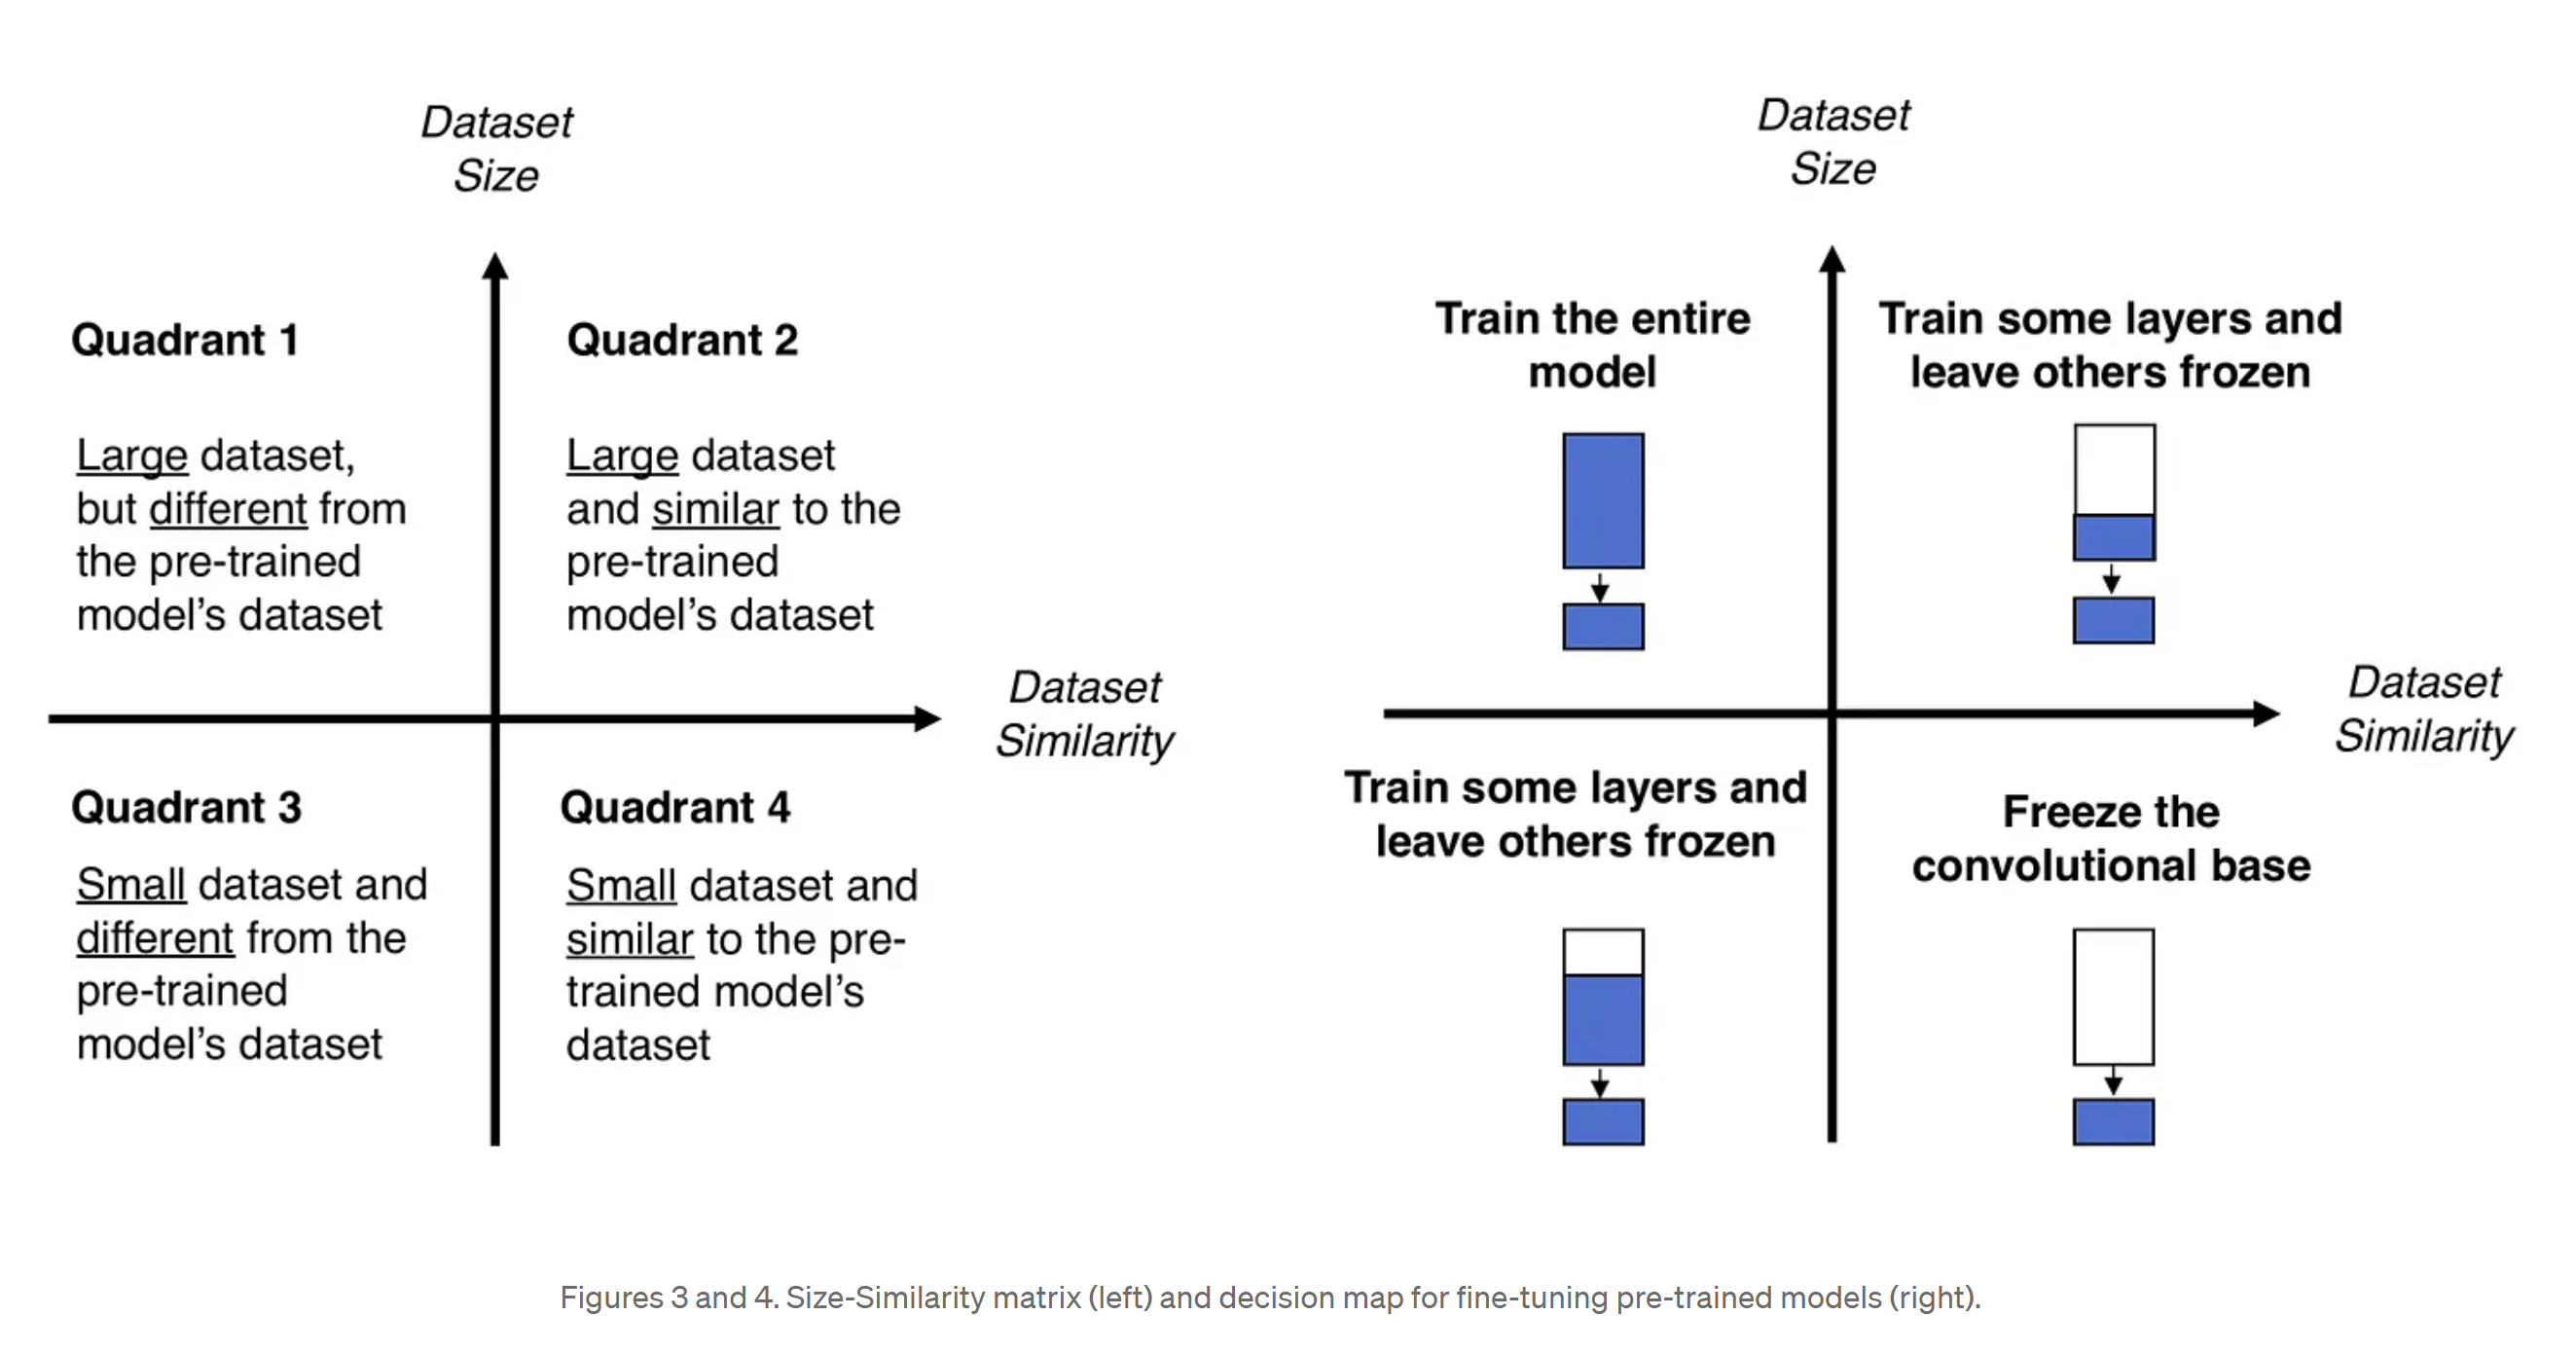

Reference: https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751

# Fine Tuning the Model
Freezing all layers until the fourth from the last

In [80]:
conv_base.trainable = True
for layer in conv_base.layers[:15]:
    layer.trainable = False

# Make sure you have frozen the correct layers
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_4 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


Fine-tuning the model with image augmentation

In [81]:
# inputs = keras.Input(shape=(224, 224, 3))
# x = data_augmentation(inputs)
# x = keras.applications.vgg16.preprocess_input(x)
# x = conv_base(x)
# x = layers.Flatten()(x)
# x = layers.Dense(256)(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(196, activation="softmax")(x)
# model = keras.Model(inputs, outputs)



# Create Custom Model
for i, layer in enumerate(model.layers):
  print(i, layer.name, layer.trainable)

0 input_5 True
1 sequential True
2 tf.__operators__.getitem True
3 tf.nn.bias_add True
4 vgg16 True
5 flatten_2 True
6 dense_3 True
7 batch_normalization True
8 dropout_2 True
9 dense_4 True
10 batch_normalization_1 True
11 dropout_3 True
12 dense_5 True


In [82]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.h5",
        save_best_only=True,
        monitor="val_loss"),

    # keras.callbacks.ReduceLROnPlateau(
    #   monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1),

    keras.callbacks.EarlyStopping(
      monitor='val_loss', patience=10, restore_best_weights=True)
]

In [83]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
304/304 [==============================] - 24s 70ms/step - loss: 5.9251 - accuracy: 0.0101 - val_loss: 11.5932 - val_accuracy: 0.0065
Epoch 2/100
304/304 [==============================] - 20s 66ms/step - loss: 5.4100 - accuracy: 0.0146 - val_loss: 17.4652 - val_accuracy: 0.0077
Epoch 3/100
304/304 [==============================] - 21s 69ms/step - loss: 5.1003 - accuracy: 0.0242 - val_loss: 5.2190 - val_accuracy: 0.0429
Epoch 4/100
304/304 [==============================] - 20s 67ms/step - loss: 4.9417 - accuracy: 0.0309 - val_loss: 10.2897 - val_accuracy: 0.0485
Epoch 5/100
304/304 [==============================] - 20s 66ms/step - loss: 4.8323 - accuracy: 0.0364 - val_loss: 7.9717 - val_accuracy: 0.0371
Epoch 6/100
304/304 [==============================] - 20s 66ms/step - loss: 4.7423 - accuracy: 0.0436 - val_loss: 10673.8203 - val_accuracy: 0.0300
Epoch 7/100
304/304 [==============================] - 20s 66ms/step - loss: 4.6279 - accuracy: 0.0532 - val_loss: 7809.762

In [84]:
model = keras.models.load_model("feature_extraction_with_data_augmentation.h5")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

102/102 [==============================] - 5s 42ms/step - loss: 2.1498 - accuracy: 0.6725
Test accuracy: 0.673


In [85]:
model = keras.models.load_model("fine_tuning.h5")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

102/102 [==============================] - 5s 42ms/step - loss: 57.2776 - accuracy: 0.0399
Test accuracy: 0.040


1/1 [==============================] - 1s 626ms/step


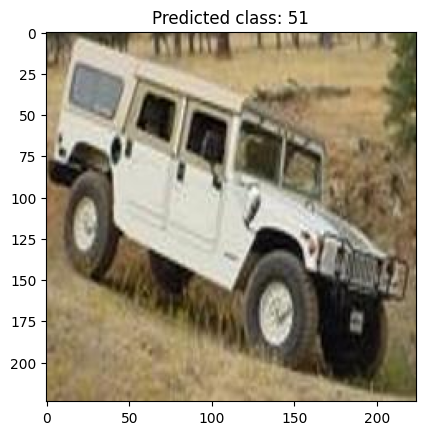

In [89]:
# prompt: predict the image on trained model  and show image

import matplotlib.pyplot as plt
import numpy as np
image_path = "/content/DataSet/croppedResizedImages/test/1/00773.jpg"

# Load the image
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))

# Preprocess the image
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.vgg16.preprocess_input(x)

# Make prediction
predictions = model.predict(x)
predicted_class = np.argmax(predictions)

# Show the image
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.show()


In [91]:
# prompt: Generate 10 random images with class name coming from dataframe called metadata from folder `/content/DataSet/images/cars_test`. Generally, the model gives a class number, so you need to lookup on metadata dataframe. I need the model predictions and class it detected and accuracy as well. Use the fine_tuning.h5 for loading and predictions.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/fine_tuning.h5')

# Load the metadata dataframe

# Get a list of all the images in the test folder
images = glob.glob('/content/DataSet/images/cars_test/*.jpg')


# Generate 5 random images
random_images = random.sample(images, 5)

# Create a figure to hold the subplots
plt.figure(figsize=(25, 20))  # Adjust the size as needed

# Predict the class of each image and get the accuracy
for i, image_path in enumerate(random_images, start=1):
    # Load the image
    img = load_img(image_path, target_size=(224, 224))

    # Preprocess the image
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Make prediction
    predictions = model.predict(x)
    predicted_class = np.argmax(predictions)

    # Get the class name from the metadata dataframe
    class_name_pred = metadata.iloc[metadata['class_id'] == predicted_class, 'class_name'].values[0]

    # Get the accuracy
    accuracy = predictions[0][predicted_class] * 100

    # Plot the image
    ax = plt.subplot(1, 5, i)  # 1 row, 5 columns, index i
    plt.imshow(img)
    plt.title(f"{image_path}: \n{class_name_pred}\n{accuracy:.2f}%")
    # plt.title(f"Predicted class: {predicted_class, class_name_pred}, Accuracy: {accuracy:.3f}%, \n Image Path: {image_path}")
    plt.axis('off')  # Hide axes ticks

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 190ms/step


NotImplementedError: iLocation based boolean indexing on an integer type is not available

<Figure size 2500x2000 with 0 Axes>